In [ ]:
from fastai.vision import *

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path = Path('/content/gdrive/MyDrive/slices/')

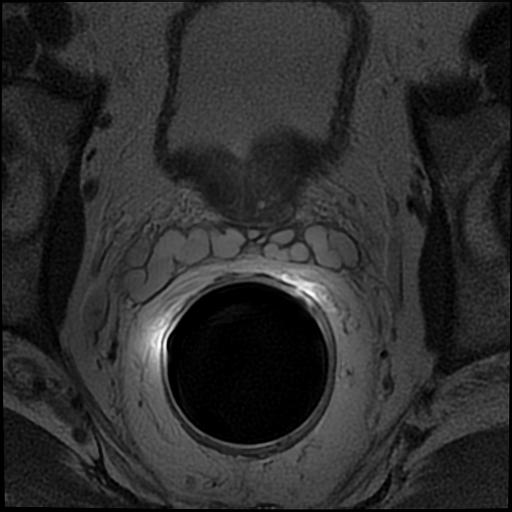

In [ ]:
img = open_image('/content/gdrive/MyDrive/slices/img/patient6_18.jpg')
img_GT = open_image('/content/gdrive/MyDrive/slices/mask/patient6_18.jpg')
img

In [ ]:
def my_open(self, fn):
  return open_mask(fn, after_open=self.after_open,div=True)

SegmentationLabelList.open = my_open

In [ ]:
data = (SegmentationItemList.from_folder(path='/content/gdrive/MyDrive/slices/img')
        .split_by_rand_pct(0.2)
        .label_from_func(lambda x : str(x).replace('img','mask'), classes=[0,1])
        .transform(get_transforms(), size = 256, tfm_y=True)
        .databunch(path=Path('.'), bs=8)
        .normalize(imagenet_stats))

/usr/local/lib/python3.7/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  return _solve_func(B,A)[0][:,0]


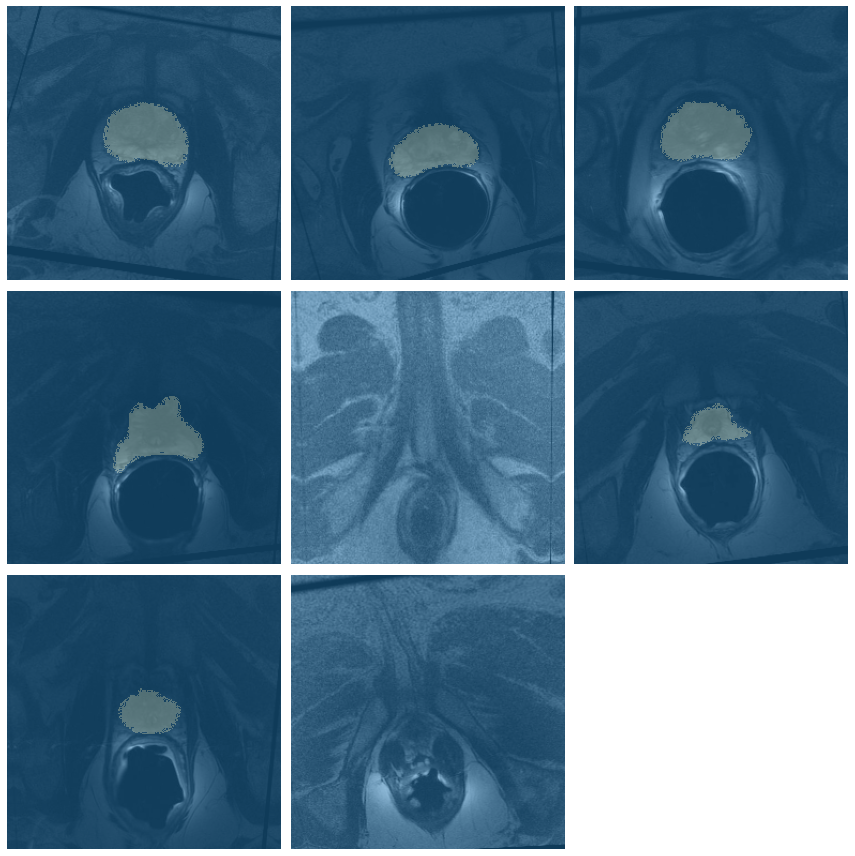

In [ ]:
data.show_batch()

In [ ]:
learn = unet_learner(data, models.resnet34,metrics=[dice])

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,dice,time
0,0.145293,0.228080,0.431373,01:28
1,0.352522,0.167774,0.450980,00:10
2,0.397438,0.162962,0.450980,00:10
3,0.285775,0.124993,0.450980,00:10
4,0.210663,0.072508,0.450980,00:10
5,0.154897,0.088082,0.450980,00:10
6,0.119045,0.056981,0.450980,00:10
7,0.093228,0.053339,0.450980,00:10
8,0.075783,0.050869,0.450980,00:10
9,0.065247,0.049786,0.450980,00:10


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


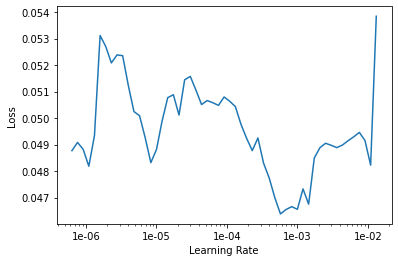

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.unfreeze()
lr = 1e-3
learn.fit_one_cycle(8, slice(lr/30, lr))

epoch,train_loss,valid_loss,dice,time
0,0.019966,0.020419,0.858058,00:11
1,0.022197,0.026646,0.766624,00:11
2,0.025153,0.019505,0.882993,00:11
3,0.022572,0.016060,0.864932,00:11
4,0.020382,0.017762,0.840514,00:11
5,0.018389,0.018859,0.855201,00:11
6,0.016355,0.015812,0.881519,00:11
7,0.014761,0.015448,0.881941,00:11


In [ ]:
learn.summary()

DynamicUnet
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 128, 128]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 128, 128]       128        True      
______________________________________________________________________
ReLU                 [64, 128, 128]       0          False     
______________________________________________________________________
MaxPool2d            [64, 64, 64]         0          False     
______________________________________________________________________
Conv2d               [64, 64, 64]         36,864     True      
______________________________________________________________________
BatchNorm2d          [64, 64, 64]         128        True      
______________________________________________________________________
ReLU                 [64, 64, 64]         0          False     
__________________________________________________

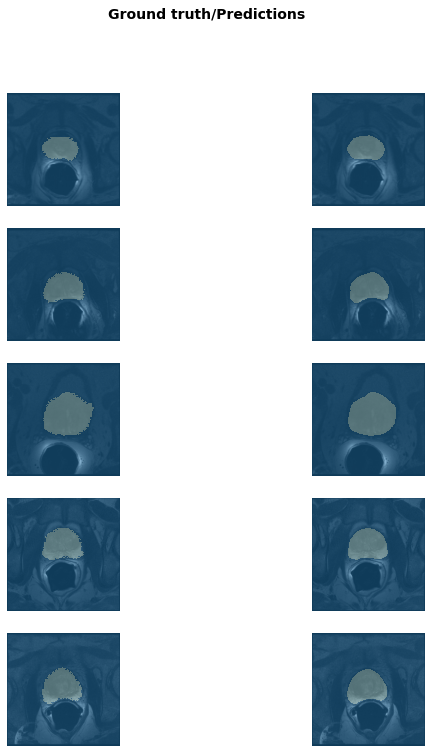

In [ ]:
learn.show_results(figsize=(10,12))

In [ ]:
learn.save('model-stage-1') # save model
learn.load('model-stage-1');

learn.export()

In [ ]:
from cv2 import *

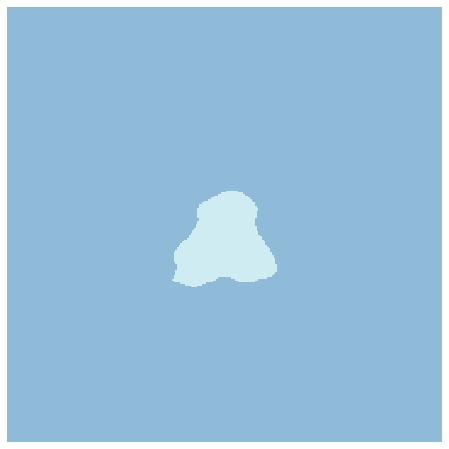

In [ ]:
img = open_image('/content/gdrive/MyDrive/slices/test data/test 20.jpg')
prediction = learn.predict(img)
prediction[0].show(figsize=(8,8))


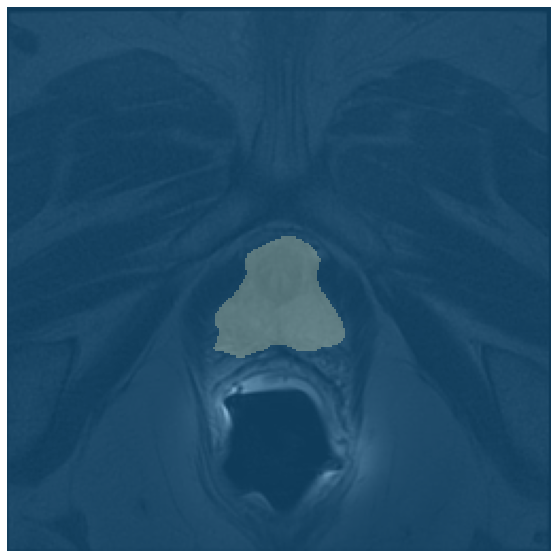

In [ ]:
img.show(y=learn.predict(img)[0], figsize=(10,10))